# Data Analysis with Python using Jupyter Notebook

This goal of this project is to build a good predictor model to predict the price of an used car from the Automobile Dataset,1985 using The Pandas Library in Python. Here, I use correlation, regression, visualization, pipelines and other basic analysis operations to train the test set and build a good prediction model.
The data type is a csv file found in the url :  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data  

### Data Acquisition and reading
The data is imported from the url and the necessary packages are imported from library.

In [1]:
# import pandas library
import pandas as pd
# import pandas library
import pandas as pd
# reading the file from the url and assigning it to a variable "df"
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df = pd.read_csv(path,header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


From the above output, it is noted that the given dataset has 205 rows X 26 columns(to reduce the output size,only a sample of 5 rows is displayed) and does not have column headers, so the pandas has automatically assigned integers from 0 as column headers.

To better describe our data we can introduce a header, this information is available at: https://archive.ics.uci.edu/ml/datasets/Automobile

Thus, we have to add headers manually.

In [595]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
headers
df.columns = headers

#rechecking the dataframe
df.head(5)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Getting basic insight of the data
First we remove the null or missing values from the price column, then get a summary statistics of the entire dataframe.

In [596]:
#drop the missing values in price
df.dropna(subset=["price"], axis=0)

# describe all the columns 
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


### Identifying and handling missing values
In this dataset, missing data "?" is replaced with NaN (Not a Number), for reasons of computational speed and convenience. Then we use .isnull() to identify these missing values with either True or False output, so that we can count the number of missing values in each column.


In [597]:
import numpy as np
# replace "?" to NaN
df.replace("?", np.nan, inplace = True)
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data and 7 columns containing missing data:

1."normalized-losses": 41 missing data

2."num-of-doors": 2 missing data

3."bore": 4 missing data

4."stroke" : 4 missing data

5."horsepower": 2 missing data

6."peak-rpm": 2 missing data

7."price": 4 missing data

### Dealing with missing data
Dropping all the missing entries in the dataset might affect the outcome of some functions, so instead we use different methods to each column.

"price": 4 missing data, simply delete the whole row

Price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore they are not useful and the entire row can be dropped.

"num-of-doors": 2 missing data, replace them with "four". 

84% sedans is four doors. Since four doors is most frequent, it is most likely to repeat again. So we replace these rows by frequency.

"normalized-losses": 41 missing data, replace them with mean


"stroke": 4 missing data, replace them with mean

"bore": 4 missing data, replace them with mean

"horsepower": 2 missing data, replace them with mean

"peak-rpm": 2 missing data, replace them with mean

The other five columns are replaced with the means of the remaining values in the respective columns.

In [598]:
# drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)
df.reset_index(drop = True, inplace = True)

In [599]:
#checking for most frequent value in "num-of-doors"
df['num-of-doors'].value_counts().idxmax()

'four'

In [600]:
#replace the missing "num-of-doors" values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace = True)

#replace with mean
#"normalizes-losses"
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)
#"bore"
avg_2=df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_2, inplace= True)
#"stroke"
avg_3 = df["stroke"].astype("float").mean(axis = 0)
df["stroke"].replace(np.nan, avg_3, inplace = True)
#"horsepower"
avg_4=df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_4, inplace= True)
#"peak-rpm"
avg_5=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Convert data types to proper format

Next step is to make sure all the data are in the correct format. 

In [601]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.

In [602]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Binning

For easy analysis,we rearrange the "horsepower" column with 57 unique values ranging from 48 to 288 into 3 bins, namely, high horsepower, medium horsepower, and little horsepower using the 'cut' method.

In [603]:
#converting into correct format
df["horsepower"]=df["horsepower"].astype(float, copy=True)
#making 4 bins of equal size
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
#building bin array
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
#setting group names
group_names = ['Low', 'Medium', 'High']
#applying 'cut'
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,include_lowest=True )
df[['horsepower','horsepower-binned']].head(15)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


To understand the distribution of bins better, we use the histogram visualization.

Text(0.5,1,'horsepower bins')

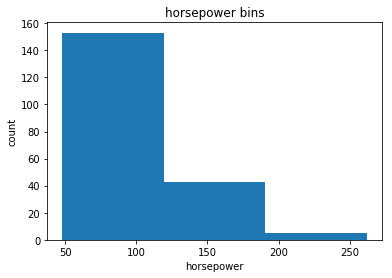

In [604]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Dummy variables
To use the categorical variables in future analysis, we replace them with dummy variables(0 or 1)
The column "fuel-type" has two unique values, "gas" or "diesel". Some functions like the Regression doesn't understand words, only numbers. So, we convert "fuel-type" into indicator variables.

In [605]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [606]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111.0,5000.0,21,27,13495.0,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111.0,5000.0,21,27,16500.0,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154.0,5000.0,19,26,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102.0,5500.0,24,30,13950.0,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115.0,5500.0,18,22,17450.0,Medium,0,1


As above, create indicator variable to the column of "aspiration": "std" to 0, while "turbo" to 1.

In [607]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [608]:
#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,111.0,5000.0,21,27,13495.0,Medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,111.0,5000.0,21,27,16500.0,Medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,154.0,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,102.0,5500.0,24,30,13950.0,Medium,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,115.0,5500.0,18,22,17450.0,Medium,0,1,1,0


### Standardization

#### Transform mpg to L/100km:

In this dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assuming we are developing an application in a country that accept the fuel consumption with L/100km standard, we apply data transformation to transform mpg into L/100km?
The formula for unit conversion is L/100km = 235 / mpg

In [609]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo,city-L/100km,highway-L/100km
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,13495.0,Medium,0,1,1,0,11.190476,8.703704
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,21,27,16500.0,Medium,0,1,1,0,11.190476,8.703704
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,19,26,16500.0,Medium,0,1,1,0,12.368421,9.038462
3,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,24,30,13950.0,Medium,0,1,1,0,9.791667,7.833333
4,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,18,22,17450.0,Medium,0,1,1,0,13.055556,10.681818


### Normalization
To scale the columns "length", "width" and "height" we normalize those variables so their value ranges from 0 to 1 by replacing original value by (original value)/(maximum value).

In [610]:
# replace (origianl value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 
# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [611]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo,city-L/100km,highway-L/100km
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,Medium,0,1,1,0,11.190476,8.703704
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,Medium,0,1,1,0,11.190476,8.703704
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,Medium,0,1,1,0,12.368421,9.038462
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,Medium,0,1,1,0,9.791667,7.833333
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,Medium,0,1,1,0,13.055556,10.681818


### Analyzing Individual Feature Patterns using Visualization

In [612]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### Correlation

In [613]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo,city-L/100km,highway-L/100km
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,0.279719,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615,0.066171,-0.029807
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,0.239544,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911,0.238567,0.181189
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,-0.360233,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889,0.476153,0.577576
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,-0.286035,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085,0.657373,0.707108
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,-0.245852,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732,0.673363,0.736728
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,...,-0.309913,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336,0.003811,0.084301
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,...,-0.279350,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955,0.785353,0.836921
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,...,-0.256753,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040,0.745059,0.783465
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,...,-0.267338,-0.582121,-0.591390,0.543154,0.054435,-0.054435,-0.227782,0.227782,0.554726,0.559197
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,...,-0.063720,-0.034079,-0.034741,0.082267,0.241033,-0.241033,-0.218190,0.218190,0.036285,0.047199


### Linear relationship
The scatterplot of some columns' relationship with price are shown below.

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


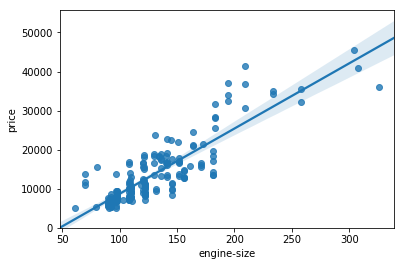

In [614]:
# Engine size vs price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)
df[["engine-size", "price"]].corr()

The scatterplot of "highway-mpg" and "price" gives a negative relationship.

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


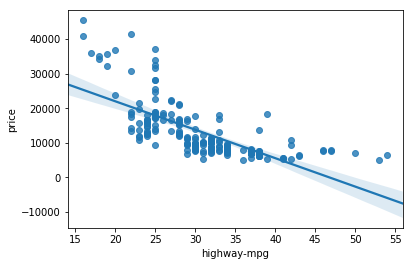

In [615]:
#highway-L/100km vs price
sns.regplot(x="highway-mpg", y="price", data=df)
df[['highway-L/100km', 'price']].corr()

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


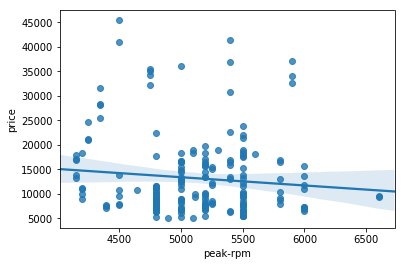

In [616]:
#peak-rpm vs price
sns.regplot(x="peak-rpm", y="price", data=df)
df[['peak-rpm','price']].corr()

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


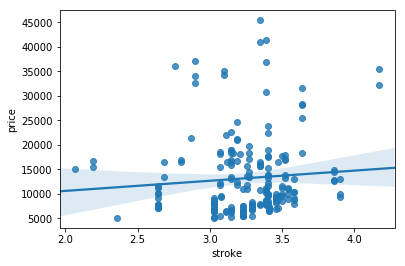

In [617]:
#stroke vs price
sns.regplot(x="stroke", y="price", data=df)
df[['stroke','price']].corr()

### Categorical variables
Now we visualize some categorical variables using boxplot.

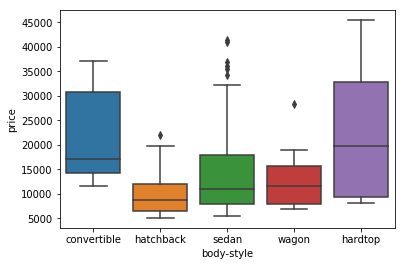

In [618]:
#body-style vs price
sns.boxplot(x="body-style", y="price", data=df)

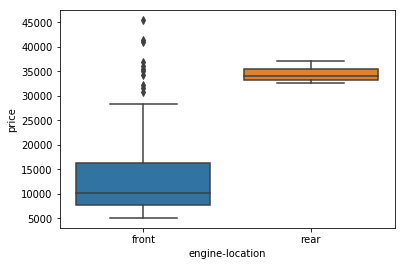

In [619]:
#engine-location vs price
sns.boxplot(x="engine-location", y="price", data=df)

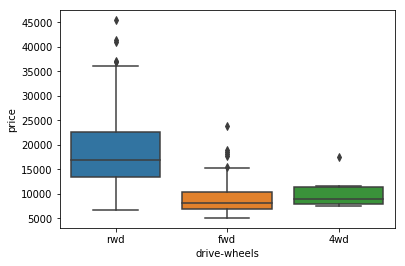

In [620]:
#drive-wheels vs price
sns.boxplot(x="drive-wheels", y="price", data=df)

### Descriptive Statistical Analysis

First, let us view the basic summary of the dataset using .describe() function.

In [621]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330711,3.256904,...,5117.587940,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104,9.944145,8.044957
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113178,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397,2.534599,1.840739
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5117.587940,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,18.076923,14.687500


As seen above, the describe function has automatically computed the basic statistics for all continuous variables. 

The table shows:

1.The count of that variable


2.The mean

3.The standard deviation (std)

4.The minimum value

5.The IQR (Interquartile Range: 25%, 50% and 75%)

6.The maximum value

Since the default setting of "describe" skips variables of type 'object'. We apply the method "describe" on the variables of type 'object' as follows:

In [622]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


We apply the "value_counts" method on the column 'drive-wheels' to understand how many units of each characteristic/variable we have.

In [623]:
df['drive-wheels'].value_counts()
#convert the series to a Dataframe
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
#renaming and replacing the column
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


Repeat the same process for the column 'engine-location'.

In [624]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

### Grouping
 Let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [625]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

To know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

In [626]:
df_group_one=df[['drive-wheels','body-style','price']]

# grouping results
df_group_one=df_group_one.groupby(['drive-wheels'],as_index= False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From this data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

Now, let's group by both 'drive-wheels' and 'body-style'.

In [627]:
# grouping results
df_gptest=df[['drive-wheels','body-style','price']]
grouped_test1=df_gptest.groupby(['drive-wheels','body-style'],as_index= False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data would be much easier to visualize when it is made into a pivot table. 

In [628]:
grouped_pivot=grouped_test1.pivot(index='drive-wheels',columns='body-style')
#fill missing values with 0
grouped_pivot=grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Visualization
Let's use a heat map to visualize the relationship between Body Style vs Price.

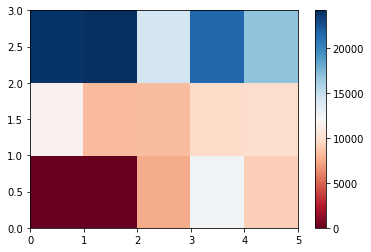

In [629]:
import matplotlib.pyplot as plt
% matplotlib inline 
#using the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The default label conveys no useful information, so we need to change them.

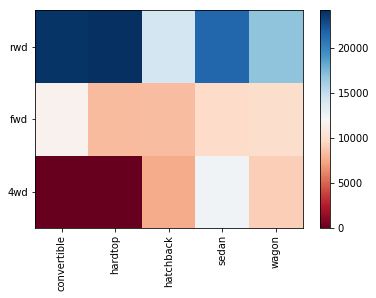

In [630]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

This gives us a pretty clear idea on how the two variables affect the price. However, the main question we want to answer in this module, is "What are the main characteristics which have the most impact on the car price?".

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how is the car price dependent on this variable?

### Correlation and causation

For this purpose, we calculate the Pearson correlation coefficient and P-value.

In [631]:
from scipy import stats

#### Wheel-base vs Price

In [632]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655081  with a P-value of P = 8.076488270732955e-20


##### Conclusion:
Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

#### Horsepower vs Price

In [633]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8096811975632284  with a P-value of P = 6.058444649710872e-48


##### Conclusion:
Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

#### Length vs Price

In [634]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483642  with a P-value of P = 8.016477466158713e-30


##### Conclusion:
Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

#### Width vs Price

In [635]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522673  with a P-value of P = 9.20033551048166e-38


##### Conclusion:
Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

#### Curb-weight vs Price

In [636]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P = 2.1895772388936997e-53


##### Conclusion:
Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

#### Engine-size vs Price

In [637]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


##### Conclusion:
Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

#### Bore vs Price

In [638]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.5431537659807731  with a P-value of P = 8.051208825441229e-17


##### Conclusion:
Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

#### City-mpg vs Price

In [639]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P = 2.3211320655676368e-29


##### Conclusion:
Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

#### Highway-mpg vs Price

In [640]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.8011176263981975  with a P-value of P = 3.0467845810412534e-46


##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

### Analysis of Variables

Now, we use The Analysis of Variance (ANOVA) method to test whether there are significant differences between the means of two or more groups.

If the price variable is strongly correlated with the variable we are analyzing, we can expect ANOVA to return a sizeable F-test score and a small p-value.

#### Drive Wheels

In [641]:
grouped_test2=df_gptest[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [642]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [643]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But we need to check if this means all three tested groups are this highly correlated.

##### Separately: fwd and rwd

In [644]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


##### 4wd and rwd

In [645]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


##### 4wd and fwd

In [646]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


### Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

-Length
-Width
-Curb-weight
-Engine-size
-Horsepower
-City-mpg
-Highway-mpg
-Wheel-base
-Bore

Categorical variables:

-Drive-wheels

We now move into building machine learning models to automate our analysis by feeding the model with variables that meaningfully affect our target variable and improve our model's prediction performance.

### Model Development

Here we develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

#### Linear regression

In [647]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Highway-mpg and car price

In [648]:
#we use "highway-mpg" as the predictor variable and the "price" as the response variable
X = df[['highway-L/100km']]
Y = df['price']
#fit
lm.fit(X,Y)
#prediction output
Yhat=lm.predict(X)
Yhat[0:5] 

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 ])

In [649]:
#intercept(a)
lm.intercept_
#slope
lm.coef_

array([3458.68511314])

The relationship to find price based on highway-mpg is given by 
Price=38423.31-821.73*highway-mpg

Similarly, other variables can be used to find the  price as well(code not given).

This relationship can be clearly analyzed using a visualization plot.

#### Regression Plot

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 48287.53681105885)

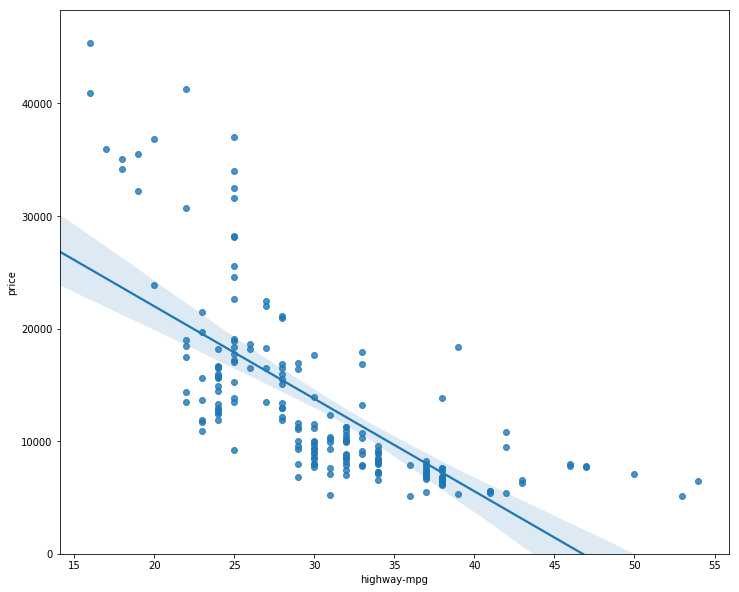

In [650]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 
#highway-mpg
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 47422.919330307624)

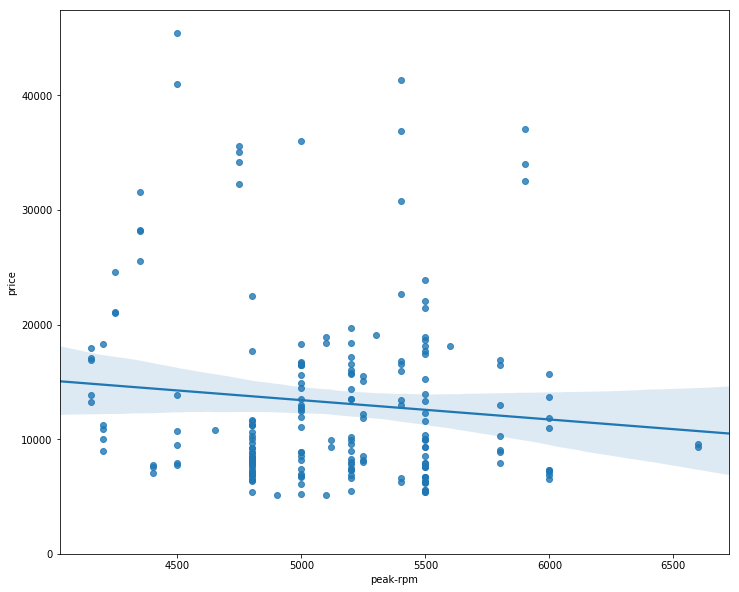

In [651]:
#regression plot of "peak-rpm"
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [652]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058605,-0.101542
highway-mpg,-0.058605,1.000000,-0.704692
price,-0.101542,-0.704692,1.000000


The variable "peak-rpm" has a stronger correlation with "price" compared to "highway-mpg".

#### Residual plot

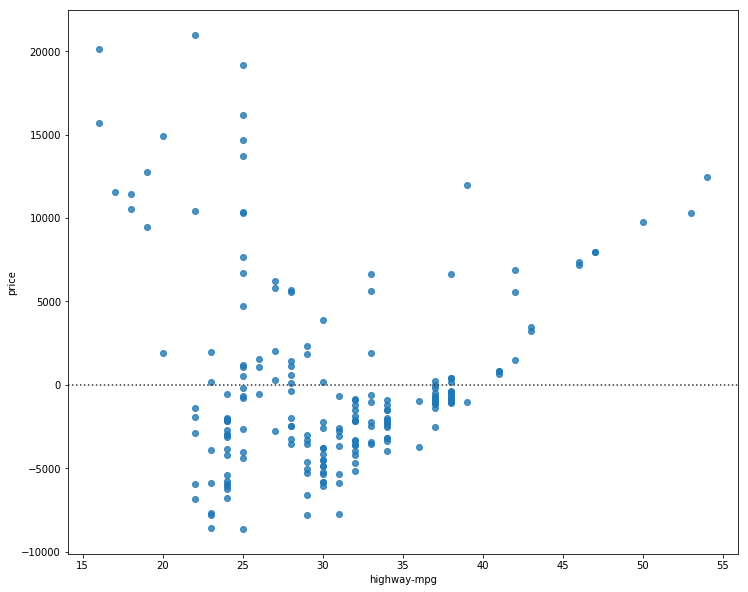

In [653]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

#### Multiple Linear Regression
We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values using a distribution plot.

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


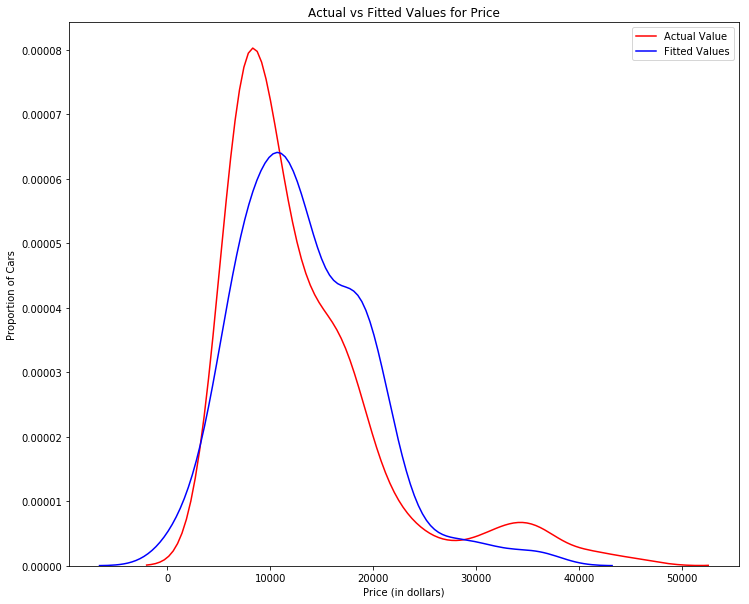

In [654]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm1 = LinearRegression()
lm1
lm1.fit(Z, df['price'])
lm1.intercept_    
lm.coef_
#predict
Y_hat = lm1.predict(Z)
#plot
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

### Polynomial Regression and Pipelines
Since the linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [655]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
#variables
x = df['highway-mpg']
y = df['price']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


AttributeError: 'AxesSubplot' object has no attribute 'set_axis_bgcolor'

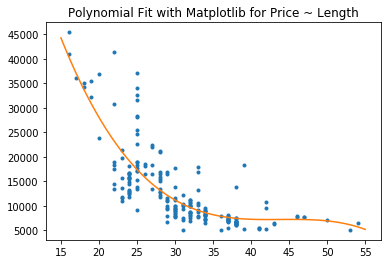

In [656]:
#plot
PlotPolly(p,x,y, 'highway-mpg')

In [ ]:
np.polyfit(x, y, 3)

We can already see from plotting that this polynomial model performs better than the linear model as the generated polynomial function "hits" more of the data points.

Now we can use pipeline to simplify the steps in our data processing.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
#pipeline
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:4]

### Model Accuracy

To estimate how accurate our model is, we use R-squared and Mean Squared Error.

In [ ]:
#highway_mpg_fit
lm.fit(X,Y)
# Find the R^2
lm.score(X, Y)

Yhat=lm.predict(X)
Yhat[0:4]

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
#mean_squared_error(Y_true, Y_predict)
mean_squared_error(df['price'], Yhat)

We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

In [ ]:
# multi_fit
lm.fit(Z, df['price'])
# Find the R^2
lm.score(Z, df['price'])
Y_predict_multifit = lm.predict(Z)
#comparision
mean_squared_error(df['price'], Y_predict_multifit)

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
#polynomial_fit
r_squared = r2_score(y, p(x))
r_squared
mean_squared_error(df['price'], p(x))

We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit.

### Prediction and Decision Making

As we have trained the model using the method fit, we will now use the method predict to produce a prediction.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [ ]:
#new input
new_input=np.arange(1,100,1).reshape(-1,1)
#fit
lm.fit(X, Y)
#prediction
yhat=lm.predict(new_input)
yhat[0:5]

In [ ]:
#plot
plt.plot(new_input,yhat)
plt.show()

#### Determining a Good Model Fit

Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, let us determine a good model fit.

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.

   -R-squared: 0.49659118843391759

   -MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.

   -R-squared: 0.80896354913783497

   -MSE: 1.2 x10^7
 
Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.

   -R-squared: 0.6741946663906514

   -MSE: 2.05 x 10^7

The model with the highest R-squared value and smallest MSE is the good fit.

## Conclusion:

Comparing these three models, we can conclude that the MLR model is the best model to be able to predict price from this dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.